# FETAL HEALTH CLASSIFICATION
---




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'//content/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['severe_decelerations', 'prolongued_decelerations', 'fetal_health'], axis=1).values
Y = df['fetal_health']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=42, train_size=0.75, test_size=0.25)
X_test.shape

(532, 19)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

logreg.fit(X_train,Y_train)
Y_pred_lr = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report', classification_report(Y_test, Y_pred_lr))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_lr))
print("Training Accuracy", logreg.score(X_train, Y_train)*100)
print("Testing Accuracy", logreg.score(X_test, Y_test)*100)

from sklearn.metrics import accuracy_score
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression Model is: "+str(score_lr)+" %")

Classification Report               precision    recall  f1-score   support

           1       0.89      0.95      0.92       413
           2       0.67      0.43      0.52        82
           3       0.74      0.78      0.76        37

    accuracy                           0.86       532
   macro avg       0.77      0.72      0.74       532
weighted avg       0.85      0.86      0.85       532

Confusion Matrix [[393  13   7]
 [ 44  35   3]
 [  4   4  29]]
Training Accuracy 86.26097867001255
Testing Accuracy 85.90225563909775
The accuracy score achieved using Logistic Regression Model is: 85.9 %


# Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_nb))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_nb))
print("Training Accuracy", nb.score(X_train, Y_train)*100)
print("Testing Accuracy", nb.score(X_test, Y_test)*100)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes Model is: "+str(score_nb)+" %")

Classification Report               precision    recall  f1-score   support

           1       0.97      0.80      0.88       413
           2       0.51      0.89      0.65        82
           3       0.48      0.65      0.55        37

    accuracy                           0.80       532
   macro avg       0.65      0.78      0.69       532
weighted avg       0.87      0.80      0.82       532

Confusion Matrix [[330  60  23]
 [  6  73   3]
 [  3  10  24]]
Training Accuracy 81.68130489335006
Testing Accuracy 80.26315789473685
The accuracy score achieved using Naive Bayes Model is: 80.26 %


# Support Vector Classifer

In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_svm))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_svm))
print("Training Accuracy", sv.score(X_train, Y_train)*100)
print("Testing Accuracy", sv.score(X_test, Y_test)*100)

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM Model is: "+str(score_svm)+" %")

Classification Report               precision    recall  f1-score   support

           1       0.93      0.95      0.94       413
           2       0.67      0.56      0.61        82
           3       0.70      0.81      0.75        37

    accuracy                           0.88       532
   macro avg       0.77      0.77      0.77       532
weighted avg       0.87      0.88      0.87       532

Confusion Matrix [[391  18   4]
 [ 27  46   9]
 [  2   5  30]]
Training Accuracy 88.64491844416563
Testing Accuracy 87.78195488721805
The accuracy score achieved using Linear SVM Model is: 87.78 %


# KNN Classifier

# Decision Tree Classifier

Classification Report               precision    recall  f1-score   support

           1       0.92      0.96      0.94       413
           2       0.74      0.61      0.67        82
           3       0.82      0.76      0.79        37

    accuracy                           0.89       532
   macro avg       0.83      0.78      0.80       532
weighted avg       0.89      0.89      0.89       532

Confusion Matrix [[397  14   2]
 [ 28  50   4]
 [  5   4  28]]
Training Accuracy 91.46800501882058
Testing Accuracy 89.28571428571429
The accuracy score achieved using KNN Model is: 89.29 %


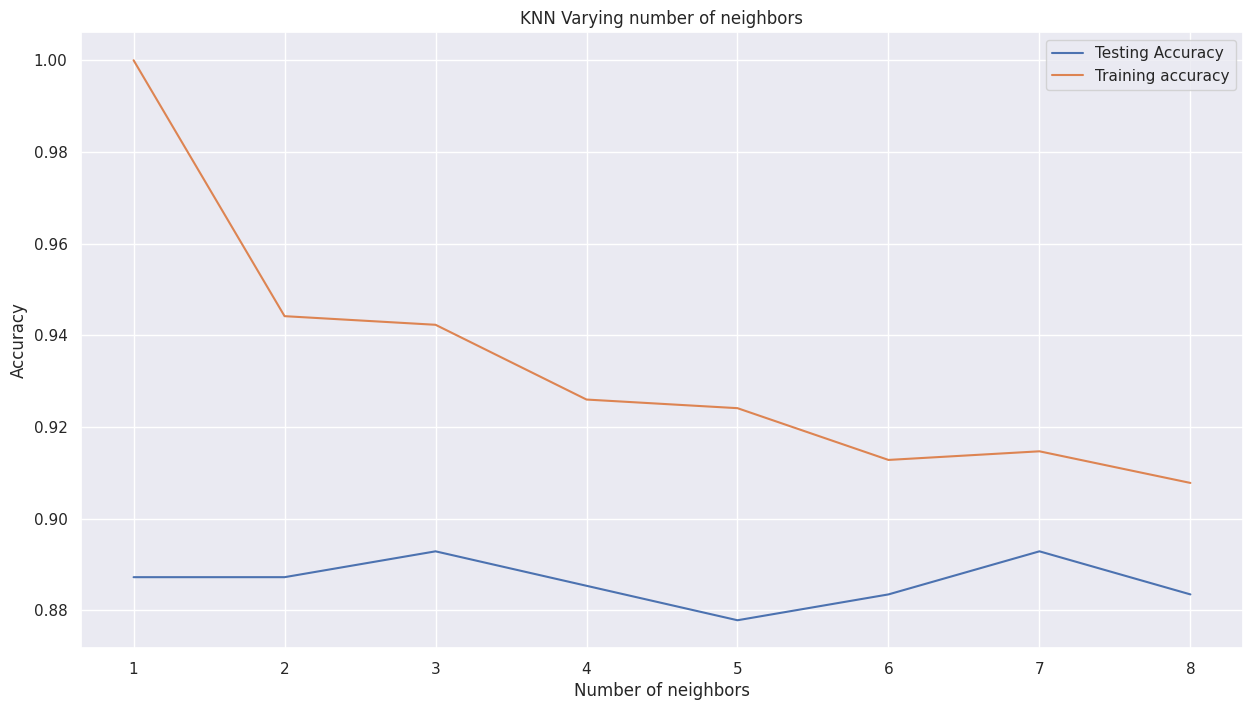

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
!pip install numpy
import numpy as np
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    #Fit the model
    knn.fit(X_train,Y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test)
knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_knn))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_knn))
print("Training Accuracy", knn.score(X_train, Y_train)*100)
print("Testing Accuracy", knn.score(X_test, Y_test)*100)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN Model is: "+str(score_knn)+" %")

plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


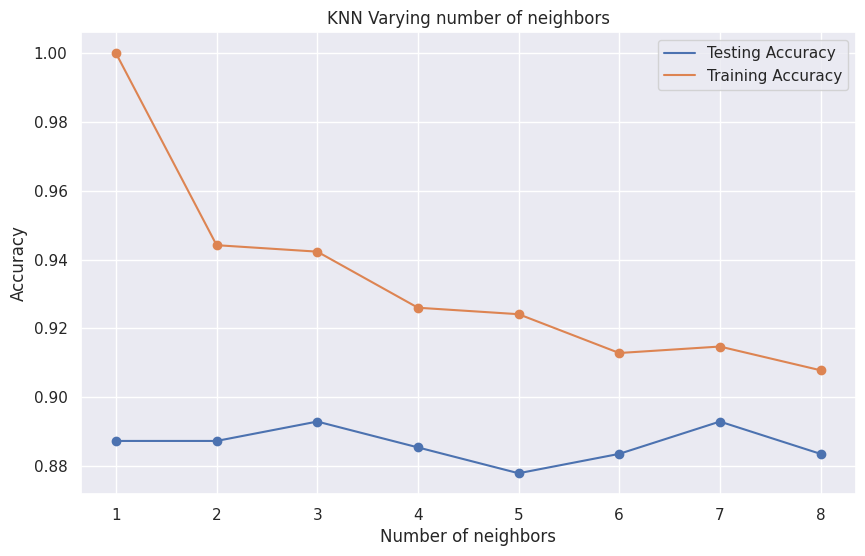

Best k: 3
Classification Report               precision    recall  f1-score   support

           1       0.93      0.95      0.94       413
           2       0.72      0.65      0.68        82
           3       0.82      0.76      0.79        37

    accuracy                           0.89       532
   macro avg       0.82      0.79      0.80       532
weighted avg       0.89      0.89      0.89       532

Confusion Matrix [[394  17   2]
 [ 25  53   4]
 [  5   4  28]]
Training Accuracy 94.22835633626097
Testing Accuracy 89.28571428571429
The accuracy score achieved using KNN Model is: 89.29 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assume X_train, X_test, Y_train, Y_test are already defined

# Setup arrays to store training and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    # Fit the model
    knn.fit(X_train, Y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.scatter(neighbors, test_accuracy)
plt.scatter(neighbors, train_accuracy)
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

# Finding the best k
best_k = neighbors[np.argmax(test_accuracy)]
print(f"Best k: {best_k}")

# Training the model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_knn))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_knn))
print("Training Accuracy", knn.score(X_train, Y_train) * 100)
print("Testing Accuracy", knn.score(X_test, Y_test) * 100)

score_knn = round(accuracy_score(Y_pred_knn, Y_test) * 100, 2)
print("The accuracy score achieved using KNN Model is: " + str(score_knn) + " %")


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')

dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_dt))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_dt))
print("Training Accuracy", dt.score(X_train, Y_train)*100)
print("Testing Accuracy", dt.score(X_test, Y_test)*100)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree Model is: "+str(score_dt)+" %")

Classification Report               precision    recall  f1-score   support

           1       0.95      0.97      0.96       413
           2       0.84      0.77      0.80        82
           3       0.92      0.92      0.92        37

    accuracy                           0.93       532
   macro avg       0.90      0.88      0.89       532
weighted avg       0.93      0.93      0.93       532

Confusion Matrix [[399  12   2]
 [ 18  63   1]
 [  3   0  34]]
Training Accuracy 100.0
Testing Accuracy 93.23308270676691
The accuracy score achieved using Decision Tree Model is: 93.23 %


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state= 0)

rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_rf))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_rf))
print("Training Accuracy", rf.score(X_train, Y_train)*100)
print("Testing Accuracy", rf.score(X_test, Y_test)*100)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using Random Forest Model is: "+str(score_rf)+" %")

Classification Report               precision    recall  f1-score   support

           1       0.95      0.98      0.96       413
           2       0.87      0.72      0.79        82
           3       0.89      0.89      0.89        37

    accuracy                           0.93       532
   macro avg       0.90      0.86      0.88       532
weighted avg       0.93      0.93      0.93       532

Confusion Matrix [[405   7   1]
 [ 20  59   3]
 [  2   2  33]]
Training Accuracy 99.3099121706399
Testing Accuracy 93.42105263157895
The accuracy score achieved using Random Forest Model is: 93.42 %


# Models and their respective Scores

In [ ]:
scores = [score_lr, score_nb, score_knn, score_rf, score_svm, score_dt]
algorithms = ["Logistic Regression","Naive Bayes", "K-Nearest Neighbors", "Random Forest", "SVM", "Decision Tree"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.9 %
The accuracy score achieved using Naive Bayes is: 80.26 %
The accuracy score achieved using K-Nearest Neighbors is: 89.29 %
The accuracy score achieved using Random Forest is: 93.42 %
The accuracy score achieved using SVM is: 87.78 %
The accuracy score achieved using Decision Tree is: 93.23 %


# Model comparison and its visualization

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

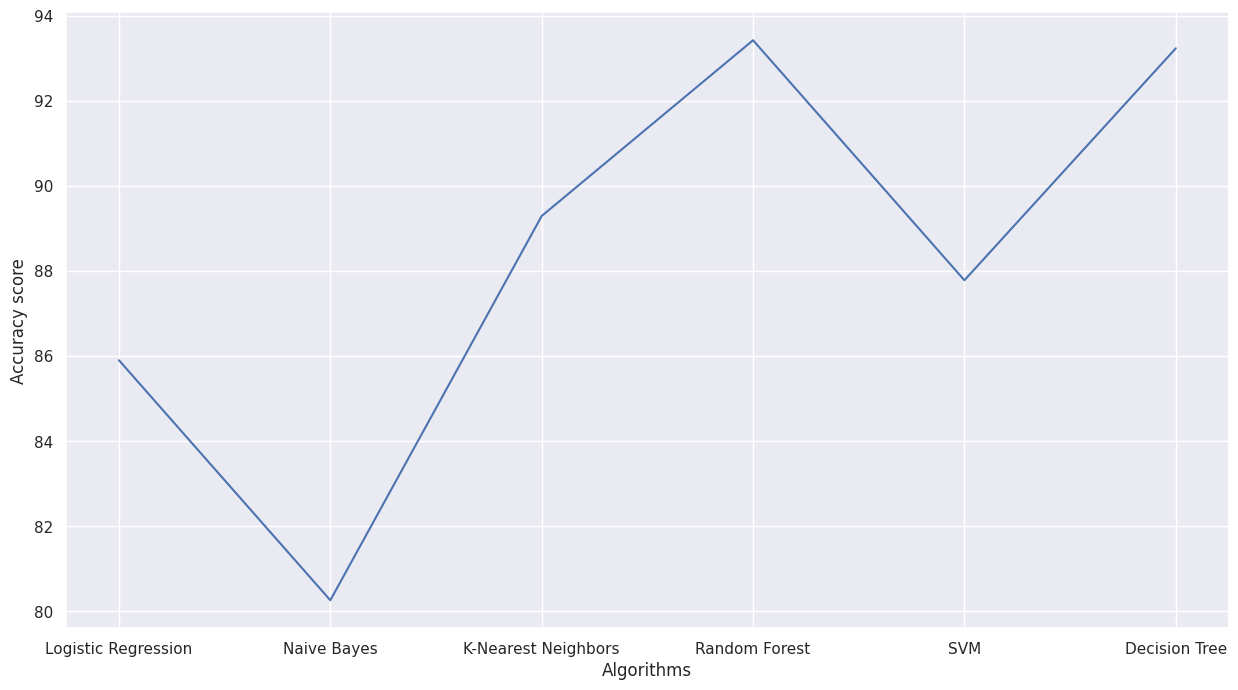

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.lineplot(x=algorithms, y=scores)

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

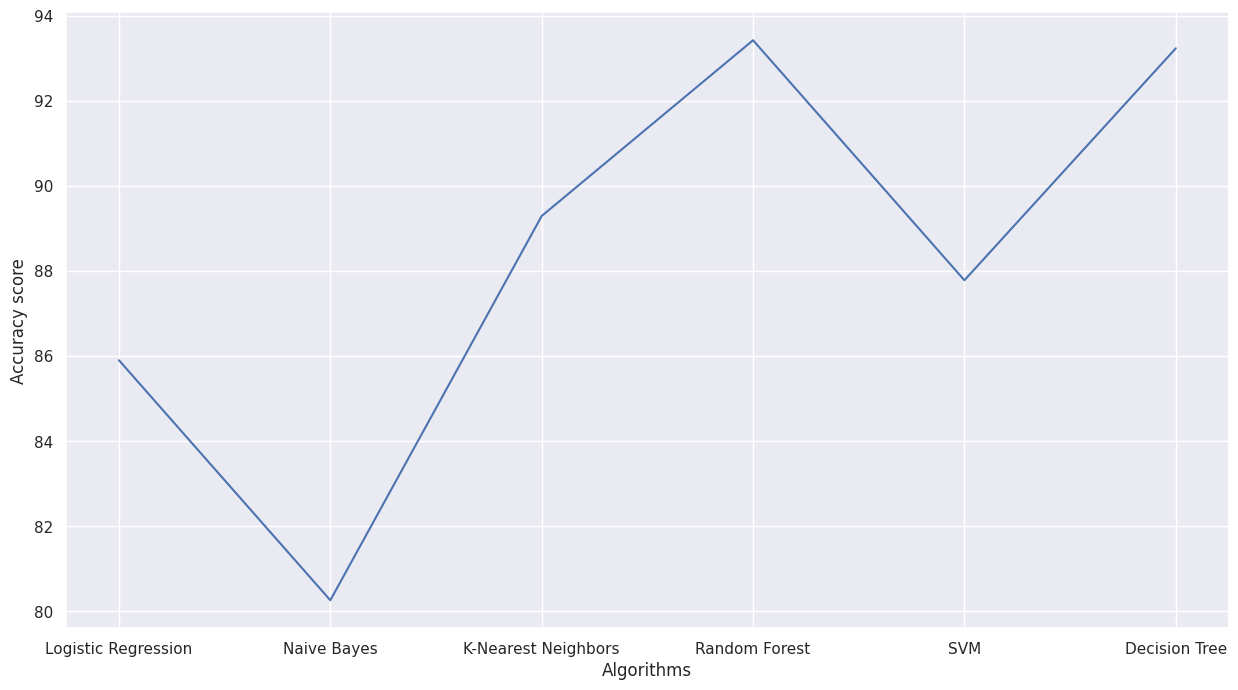

In [ ]:
# Import seaborn module
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


# Set the figure size
sns.set(rc={'figure.figsize':(15,8)})
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Random Forest", "SVM", "Decision Tree"]
# Set the x and y labels
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Create a line plot
sns.lineplot(x=algorithms, y=scores)